### **sensor**

In [1]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler 
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA


data=pd.read_csv('Sensor.csv')

print(data)

x=np.asanyarray(data.drop(columns=['D']))
y=np.asanyarray(data[['D']])

x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.1)


       S1   S2   S3  D
0      85   93  103  4
1     155  160  115  3
2     162  160  115  3
3     147  104   73  6
4      33   32   24  7
...   ...  ...  ... ..
2695  121  117   91  8
2696  155  160  115  3
2697  116  153  100  5
2698  121  120   92  8
2699  155  127   98  6

[2700 rows x 4 columns]


In [2]:
def Resultados (model,x_test,y_test):
  
  y_pred = model.predict(x_test)

#metricas
  print('Metricas: \n',metrics.classification_report(y_test,y_pred))

#Matriz de confusion
  print('Confusion matrix: \n', metrics.confusion_matrix(y_test,y_pred))

In [3]:
model=Pipeline([('scaler',StandardScaler()),
                ('cla',SVC(C=0.3,kernel='rbf'))])
model.fit(x_train,y_train.ravel())

print('train score:',model.score(x_train,y_train))
print('test score:',model.score(x_test,y_test))

Resultados(model,x_test,y_test)


train score: 0.9588477366255144
test score: 0.9481481481481482
Metricas: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        27
           2       1.00      1.00      1.00        38
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        19
           5       1.00      1.00      1.00        29
           6       0.97      1.00      0.99        36
           7       1.00      0.59      0.74        34
           8       0.70      1.00      0.82        30

    accuracy                           0.95       270
   macro avg       0.96      0.95      0.95       270
weighted avg       0.96      0.95      0.95       270

Confusion matrix: 
 [[36  0  0  0  0  0  0  0  0]
 [ 0 27  0  0  0  0  0  0  0]
 [ 0  0 38  0  0  0  0  0  0]
 [ 0  0  0 21  0  0  0  0  0]
 [ 0  0  0  0 19  0  0  0  0]
 [ 0  0  0  0  0 29  0  0  0]
 [ 0  0  0  0  0  0 

In [4]:
model=Pipeline([('scaler',StandardScaler()),('cla',MLPClassifier())])
model.fit(x_train,y_train.ravel())
print('train score:',model.score(x_train,y_train))
print('test score:',model.score(x_test,y_test))

Resultados(model,x_test,y_test)

train score: 0.988477366255144
test score: 0.9777777777777777
Metricas: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        27
           2       1.00      1.00      1.00        38
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        19
           5       1.00      1.00      1.00        29
           6       0.97      1.00      0.99        36
           7       0.89      0.94      0.91        34
           8       0.96      0.87      0.91        30

    accuracy                           0.98       270
   macro avg       0.98      0.98      0.98       270
weighted avg       0.98      0.98      0.98       270

Confusion matrix: 
 [[36  0  0  0  0  0  0  0  0]
 [ 0 27  0  0  0  0  0  0  0]
 [ 0  0 38  0  0  0  0  0  0]
 [ 0  0  0 21  0  0  0  0  0]
 [ 0  0  0  0 19  0  0  0  0]
 [ 0  0  0  0  0 29  0  0  0]
 [ 0  0  0  0  0  0 3

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


### **MNIST**

In [33]:
data=pd.read_csv('mnist_784.csv')
n=7000
m=28

x=np.asanyarray(data.drop(columns=['class']))
y=np.asanyarray(data[['class']])

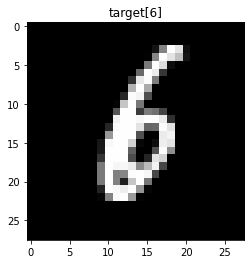

In [40]:
numero=np.random.randint(n)

plt.imshow(x[numero].reshape((m,m)),cmap=plt.cm.gray)
plt.title('target'+str(y[numero]))
plt.show()


In [51]:
def Resultados(model,x_test,y_test):

    y_pred=model.predict(x_test)

    #metricas
    print('Metricas: \n',metrics.classification_report(y_test,y_pred))

    #Matriz de confusion
    print('Confusion matrix: \n', metrics.confusion_matrix(y_test,y_pred))


               

In [55]:
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.1)

model=Pipeline([('SS',StandardScaler()),('PCA',PCA(n_components=50)),('MLP',MLPClassifier(hidden_layer_sizes=(100,100),alpha=1.5,max_iter=1000))])

model.fit(x_train,y_train.ravel())

print('train score:', model.score(x_train,y_train))
print('test score:',model.score(x_test,y_test))
Resultados(model,x_test,y_test)

train score: 0.9672380952380952
test score: 0.9645714285714285
Metricas: 
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       657
           1       0.98      0.98      0.98       773
           2       0.96      0.96      0.96       710
           3       0.97      0.95      0.96       717
           4       0.96      0.97      0.97       686
           5       0.95      0.96      0.96       621
           6       0.97      0.97      0.97       659
           7       0.98      0.96      0.97       756
           8       0.96      0.95      0.95       723
           9       0.94      0.96      0.95       698

    accuracy                           0.96      7000
   macro avg       0.96      0.96      0.96      7000
weighted avg       0.96      0.96      0.96      7000

Confusion matrix: 
 [[643   0   2   1   1   1   4   0   5   0]
 [  0 760   5   0   0   1   1   0   3   3]
 [  4   1 685   3   7   0   1   5   4   0]
 [  1   2   7 681

In [76]:
import pickle
pickle.dump(model,open('SVM_MNIST.sav','wb'))

In [71]:
model=pickle.load(open('SVM_MNIST.sav','rb'))
print('train score:',model.score(x_train,y_train))
print('test score:',model.score(x_test,y_test))
Resultados(model,x_test,y_test)

train score: 0.9672380952380952
test score: 0.9645714285714285
Metricas: 
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       657
           1       0.98      0.98      0.98       773
           2       0.96      0.96      0.96       710
           3       0.97      0.95      0.96       717
           4       0.96      0.97      0.97       686
           5       0.95      0.96      0.96       621
           6       0.97      0.97      0.97       659
           7       0.98      0.96      0.97       756
           8       0.96      0.95      0.95       723
           9       0.94      0.96      0.95       698

    accuracy                           0.96      7000
   macro avg       0.96      0.96      0.96      7000
weighted avg       0.96      0.96      0.96      7000

Confusion matrix: 
 [[643   0   2   1   1   1   4   0   5   0]
 [  0 760   5   0   0   1   1   0   3   3]
 [  4   1 685   3   7   0   1   5   4   0]
 [  1   2   7 681

In [124]:
import pickle
pickle.dump(model,open('MLP_MNIST.sav','wb'))

In [125]:
model=pickle.load(open('MLP_MNIST.sav','rb'))
print('train score:',model.score(x_train,y_train))
print('test score:',model.score(x_test,y_test))
Resultados(model,x_test,y_test)

train score: 0.9672380952380952
test score: 0.9645714285714285
Metricas: 
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       657
           1       0.98      0.98      0.98       773
           2       0.96      0.96      0.96       710
           3       0.97      0.95      0.96       717
           4       0.96      0.97      0.97       686
           5       0.95      0.96      0.96       621
           6       0.97      0.97      0.97       659
           7       0.98      0.96      0.97       756
           8       0.96      0.95      0.95       723
           9       0.94      0.96      0.95       698

    accuracy                           0.96      7000
   macro avg       0.96      0.96      0.96      7000
weighted avg       0.96      0.96      0.96      7000

Confusion matrix: 
 [[643   0   2   1   1   1   4   0   5   0]
 [  0 760   5   0   0   1   1   0   3   3]
 [  4   1 685   3   7   0   1   5   4   0]
 [  1   2   7 681

### **Segunda parte**

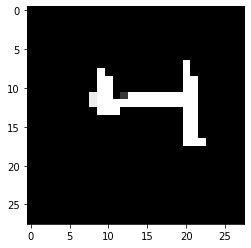

In [119]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img =cv2.imread('4.jfif')
img_gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

th,img_bn=cv2.threshold(img_gray,100,255,cv2.THRESH_BINARY_INV)
img_bn=cv2.resize(img_bn,(28,28))

plt.imshow(img_bn,cmap=plt.cm.gray)
plt.show()

x=img_bn.reshape(1,784)



In [92]:
import pickle

MLP=pickle.load(open('MLP_MNIST.sav','rb'))
SVM=pickle.load(open('SVM_MNIST.sav','rb'))

In [121]:
y_MLP=MLP.predict(x)
y_SVM=SVM.predict(x)

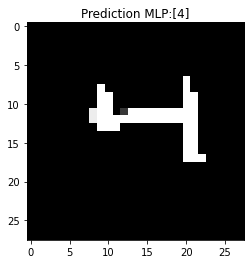

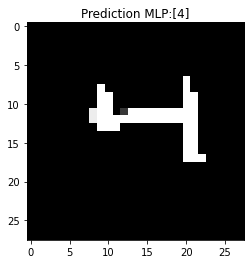

In [122]:
plt.figure()
plt.imshow(img_bn,cmap=plt.cm.gray)
plt.title('Prediction MLP:'+str(y_MLP))
plt.show()

plt.figure()
plt.imshow(img_bn,cmap=plt.cm.gray)
plt.title('Prediction MLP:'+str(y_SVM))
plt.show()